# **Implementing an MNIST classifier in PyTorch**
LINK TO FEEDBACK FORM: https://tinyurl.com/w21-atrack6-fb \\
ATTENDANCE CODE: **curling**


In [ ]:
# importing dependencies 
import torch
import numpy
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn  
import torch.nn.functional as F  

In [ ]:
y = torch.tensor([[5.2,2.4],[4.3,3.]])
y

tensor([[5.2000, 2.4000],
        [4.3000, 3.0000]])

In [ ]:
z = torch.zeros([5,2,3])
z

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])

In [ ]:
o = torch.ones([5,2,3])
o

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

In [ ]:
# entries are random values between 0 and 1
r = torch.rand([5,2,3])
r

tensor([[[0.9033, 0.4313, 0.4361],
         [0.4575, 0.0251, 0.9841]],

        [[0.0502, 0.2926, 0.8400],
         [0.6542, 0.8811, 0.9758]],

        [[0.4837, 0.6689, 0.0569],
         [0.0625, 0.0052, 0.5953]],

        [[0.7462, 0.2445, 0.2380],
         [0.0767, 0.8644, 0.4039]],

        [[0.8835, 0.5434, 0.2215],
         [0.2240, 0.3049, 0.8471]]])

# Reshaping Tensors

In [ ]:
a = torch.tensor([[5,3],[2,7]])
a

tensor([[5, 3],
        [2, 7]])

In [ ]:
a.size()

torch.Size([2, 2])

In [ ]:
b = torch.reshape(a, [1,4])
b

tensor([[5, 3, 2, 7]])

In [ ]:
b.size()

torch.Size([1, 4])

In [ ]:
# flatten
c = torch.squeeze(b)
c

tensor([5, 3, 2, 7])

In [ ]:
c.size()

torch.Size([4])

In [ ]:
d = torch.squeeze(a)
d

tensor([[5, 3],
        [2, 7]])

In [ ]:
d.size()

torch.Size([2, 2])

In [ ]:
e = torch.reshape(a, [4,1])
e.size()

torch.Size([4, 1])

In [ ]:
# note that f is the same as c
f = torch.squeeze(e)
f

tensor([5, 3, 2, 7])

# Basic Operations

In [ ]:
x = torch.tensor([[2,7],[3,6],[2,5]])
x.size()

torch.Size([3, 2])

In [ ]:
y = torch.tensor([[1,5],[4,8],[2,4]])
y.size()

torch.Size([3, 2])

In [ ]:
# addition
z = x + y
z

tensor([[ 3, 12],
        [ 7, 14],
        [ 4,  9]])

In [ ]:
# hadamard product
z = x * y
z

tensor([[ 2, 35],
        [12, 48],
        [ 4, 20]])

In [ ]:
# redefining y to perform matrix multiplication with x
y = torch.tensor([[2,7,2,3,1],[1,5,2,8,0]])
y.size()

torch.Size([2, 5])

In [ ]:
# matrix multiplication
z = torch.matmul(x,y)
z

tensor([[11, 49, 18, 62,  2],
        [12, 51, 18, 57,  3],
        [ 9, 39, 14, 46,  2]])

In [ ]:
z.size()

torch.Size([3, 5])

# Symbolic differentiation - calculating gradients from the formula

In [ ]:
x = torch.tensor([[1.,-1.],[1.,1.]], requires_grad=True)

In [ ]:
out = x.pow(2).sum()
out

tensor(4., grad_fn=<SumBackward0>)

In [ ]:
out.backward()

In [ ]:
x.grad

tensor([[ 2., -2.],
        [ 2.,  2.]])

## How we got x.grad:
$$ out = x_1^2 + x_2^2 + x_3^2 + x_4^2 \\
\frac{\partial(out)}{\partial x_1} = 2x_1 \\
\frac{\partial(out)}{\partial x_2} = 2x_2 \\
\frac{\partial(out)}{\partial x_3} = 2x_3 \\
\frac{\partial(out)}{\partial x_4} = 2x_4 $$

## Loading a dataset

In [ ]:
# defining the data set as a class
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, statements, truth):
        self.statements = statements
        self.truth = truth
        
    # one x, y value 
    def __getitem__(self, index):
        return self.statements[index], self.truth[index]
    
    # total number of samples
    def __len__(self):
        return len(self.truth)

In [ ]:
# Define a dummy dataset
# pass the data in as lists
inputs = ["Bananas are a good source of potassium.", "Apples are usually orange."]
labels = [True, False]

# creating an instance of our dataset
FruitDataset = CustomDataset(inputs, labels)

print(FruitDataset.__getitem__(0))
FruitDataset.__len__()

('Bananas are a good source of potassium.', True)


2

In [ ]:
# We can now use torch's DataLoader to create batches, shuffle etc!
# batch size = 1
FruitDataLoader1 = torch.utils.data.DataLoader(FruitDataset, batch_size=1, shuffle=True)

for i, data in enumerate(FruitDataLoader1):
    print(i, data)
print()


0 [('Bananas are a good source of potassium.',), tensor([True])]
1 [('Apples are usually orange.',), tensor([False])]



In [ ]:
# batch size = 2
FruitDataLoader2 = torch.utils.data.DataLoader(FruitDataset, batch_size=2, shuffle=True)
for i, data in enumerate(FruitDataLoader2):
    print(i, data)

0 [('Apples are usually orange.', 'Bananas are a good source of potassium.'), tensor([False,  True])]


## Let's use the MNIST - handwritten digits dataset

In [ ]:
# torch already stores the dataset                                     
TrainDataset = torchvision.datasets.MNIST("./data", train=True, transform=torchvision.transforms.ToTensor(), download=True)
TestDataset = torchvision.datasets.MNIST("./data", transform=torchvision.transforms.ToTensor(), download=True)

# defining our custom loaders
TrainDataLoader = torch.utils.data.DataLoader(TrainDataset, batch_size=16, shuffle=True)
TestDataLoader = torch.utils.data.DataLoader(TestDataset, batch_size=16, shuffle=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


torch.Size([16, 1, 28, 28]) torch.Size([16])
tensor(8)


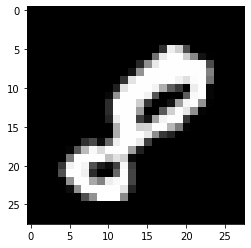

In [ ]:
# creating an iterator for our train data set
TrainIterator = iter(TrainDataLoader)
BatchOfSamples = TrainIterator.next()
Inputs, Labels = BatchOfSamples

# visualizing the data
print(Inputs.size(), Labels.size())
plt.imshow(Inputs[0].squeeze(), cmap="gray")
print(Labels[0])

## Defining our neural network

Let's define our neural network with the following parameters: 

**Layer 1**: 256 units -  $ReLU(WX + b)$

**Layer 2**: 128 units - $ReLU(WX + b)$

**Output Layer** - $Softmax(WX + b)$

**Loss** - Cross-entropy



In [ ]:
# model 

class model(nn.Module):
    
    # implement __init__
    def __init__(self, input_dim, output_dim):
        super().__init__()
        
        self.layer1 = nn.Linear(input_dim, 256)  # WX + b
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, output_dim)
        
    # forward propagation
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        
        # output 
        x = self.layer3(x)    
        
        return x   

In [ ]:
# my model

myModel = model(784, 10)

myModel

model(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# choose a loss function 

loss = nn.CrossEntropyLoss()     # includes Softmax 

# optimizer 
Optimizer = torch.optim.Adam(myModel.parameters(), lr = 0.01)


In [ ]:
# Training 

In [ ]:
myModel.train()

for epoch in range(10):   # for 10 epochs
    for batch in iter(TrainDataLoader):      # for each batch
        
        batch_inputs, batch_labels = batch
        batch_inputs = torch.reshape(batch_inputs, [16, 784])
        
        # gradients accumulate, so we need to clear them out at every iteration
        Optimizer.zero_grad()
        
        predictions = myModel(batch_inputs)
        
        # loss 
        current_loss = loss(predictions, batch_labels)
        
        current_loss.backward()
              
        Optimizer.step()    # x_new = x_old - lr*grad 
        
    print("Epoch: {} Loss: {}".format(epoch+1, current_loss))
        

Epoch: 1 Loss: 0.11998143047094345
Epoch: 2 Loss: 0.31455111503601074
Epoch: 3 Loss: 0.7755317687988281
Epoch: 4 Loss: 0.7266566753387451
Epoch: 5 Loss: 0.5225412249565125
Epoch: 6 Loss: 0.02437543496489525
Epoch: 7 Loss: 0.0005262780468910933
Epoch: 8 Loss: 0.003448616713285446
Epoch: 9 Loss: 0.00010077882325276732
Epoch: 10 Loss: 0.2999613285064697


prediction :  8


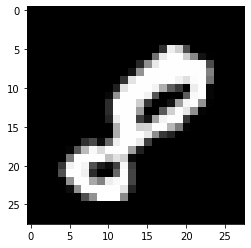

In [ ]:
# test

myModel.eval()

ip = torch.reshape(Inputs[0], [1, 784])
pred = myModel(ip).argmax(axis = 1)

plt.imshow(Inputs[0].squeeze(), cmap="gray")
print("prediction : ", pred.item())

In [ ]:
correct = 0
total = 0
for data in iter(TestDataLoader):
    # each testing sample
    batch_inputs, batch_labels = data
    batch_inputs = torch.reshape(batch_inputs, [16, 784])

    # predicting outputs
    predictions = myModel(batch_inputs).argmax(axis=1)

    total += len(batch_labels)

    # total number of correct predictions
    correct += (predictions==batch_labels).sum().item()

    
print(100*correct/total,"%")

96.85166666666667 %


In [ ]:
# save the weights
torch.save(myModel.state_dict(), "./myModel.pt")


In [ ]:
# load the weights
myNewModel = model(784, 10)

modelWeights = torch.load("./myModel.pt")

myNewModel.load_state_dict(modelWeights)

<All keys matched successfully>

### **Thank you for coming!!**
LINK TO FEEDBACK FORM: https://tinyurl.com/w21-atrack6-fb 

GITHUB: https://github.com/uclaacmai/advanced-track-winter21 

FACEBOOK: www.facebook.com/groups/uclaacmai 

OH: Thursdays 9-10 pm PST on ACM Discord